In [1]:
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
%matplotlib inline
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [3]:
import numpy as np

def random_split(X, y, train_rate=0.3):
    y_ = np.array(list(zip(y, range(len(y)))))
    np.random.shuffle(y_)
    
    train_n = int(len(y) * train_rate)
    
    y_train = y_[:train_n]
    y_test = y_[train_n:]
    
    index_train = y_train[:, 1]
    index_test = y_test[:, 1]
    
    return X[index_train], y_train[:, 0], X[index_test], y_test[:, 0]


In [4]:
for a in random_split(iris.data, iris.target):
    print(a.shape)
    

(45, 4)
(45,)
(105, 4)
(105,)


In [5]:
def LVQ(X, y, k, MAX_TIME=100, ita=0.2):
    init_index = np.random.choice(len(y), k)
    px = X[init_index]
    py = y[init_index]
    for _ in range(MAX_TIME):
        j = np.random.choice(len(y), 1)
        xj, yj = X[j], y[j]
        i = np.argmin([np.linalg.norm(xj - pi) for pi in px])
        pyi = py[i]
        
        if pyi == yj:
            px[i] = px[i] + ita * (xj - px[i])
        else:
            px[i] = px[i] - ita * (xj - px[i])
    
    return px

def PVQ_clustering(X, px):
    return np.array(list(map(lambda x: np.argmin([np.linalg.norm(x - pi) for pi in px]), X)))

In [6]:
train_x, train_y, test_x, test_y = random_split(iris.data, iris.target)
px = LVQ(train_x, train_y, 3)
y = PVQ_clustering(test_x, px)

In [7]:
px, y

(array([[ 5.84681367e+00,  3.12509028e+00,  2.19078451e+00,
         -5.19986331e-04],
        [ 5.76004905e+00,  2.74419786e+00,  3.85617830e+00,
          1.16388344e+00],
        [ 5.00088248e+00,  3.36011383e+00,  1.41751863e+00,
          2.55039694e-01]]),
 array([1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2,
        2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1,
        2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1], dtype=int64))

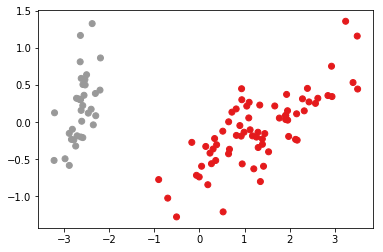

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X_reduced = PCA(n_components=2).fit_transform(test_x)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.Set1)

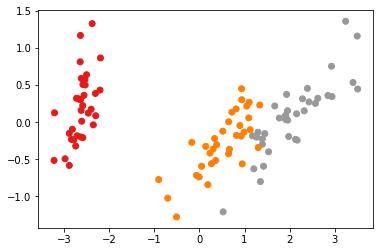

In [9]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=test_y, cmap=plt.cm.Set1)

In [10]:
def evaluate(y, t):
    a, b, c, d = [0 for i in range(4)]
    for i in range(len(y)):
        for j in range(i+1, len(y)):
            if y[i] == y[j] and t[i] == t[j]:
                a += 1
            elif y[i] == y[j] and t[i] != t[j]:
                b += 1
            elif y[i] != y[j] and t[i] == t[j]:
                c += 1
            elif y[i] != y[j] and t[i] != t[j]:
                d += 1
    return a, b, c, d

def external_index(a, b, c, d, m):
    JC = a / (a + b + c)
    FMI = np.sqrt(a**2 / ((a + b) * (a + c)))
    RI = 2 * ( a + d ) / ( m * (m + 1) )
    return JC, FMI, RI

def evaluate_it(y, t):
    a, b, c, d = evaluate(y, t)
    return external_index(a, b, c, d, len(y))

In [13]:
evaluate_it(test_y, y)

(0.5933554817275748, 0.7702957105732673, 0.7611859838274933)